In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import cholesky

# Lab 2 Exercise
1. Use the streams in Lab 1 exercise to convert the generated uniform streams to follow a Gaussian distribution of zero mean and unit variance using the Box-Muller approach: 

a. Convert the generated streams to a standard normal distribution

I have used the Box-Muller approach, and convert the uniform data 1D,2D,3D to a Gaussian distribution.

In [2]:
u1=np.random.uniform(size=1000)
u2=np.random.uniform(size=1000)
data1D=np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)

u1=np.random.uniform(size=[2,1000])
u2=np.random.uniform(size=[2,1000])
data2D=np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)

u1=np.random.uniform(size=[3,1000])
u2=np.random.uniform(size=[3,1000])
data3D=np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)

b. Visualize the data samples. 

I have plot the scatter of the datas.As we can see,the points focus on a certain range.These scatter plots do look like a normal distribution of the features.

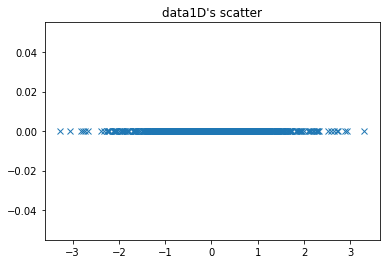

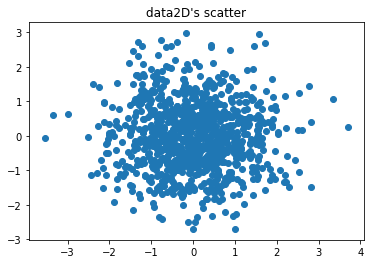

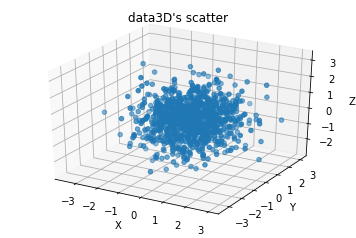

In [3]:
plt.plot(data1D,[0]*1000,"x")
plt.title("data1D's scatter")
plt.show()

x,y = data2D[0], data2D[1]
plt.scatter(x,y)
plt.title("data2D's scatter")
plt.show()

x, y, z = data3D[0], data3D[1], data3D[2]
ax = plt.subplot(111, projection='3d')# 创建一个三维的绘图工程
ax.scatter(x,y,z)
ax.set_zlabel('Z')# 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.title("data3D's scatter")
plt.show()

c. Compute the normalized histogram (pdfs) of the data samples from a and visualize the distribution.

I drew their pdf, and it is clear from the figure that they are very close to the normal distribution.

data1D's histogram: [ 1  1  0  2  2  0  1  4  6  7 10  4 17 11 18 22 41 40 33 45 46 56 53 55
 53 54 46 47 49 47 34 41 27 27 18 21 16 12  6  7  3  4  5  1  2  2  1  1
  0  1]


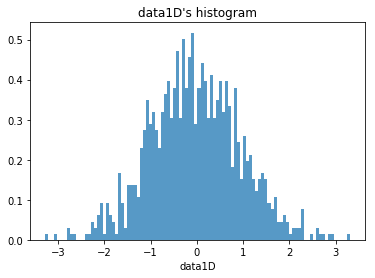

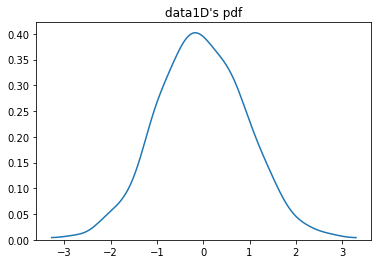

In [4]:
z=np.histogram(data1D,bins=50)
print("data1D's histogram:",z[0])

plt.hist(data1D, bins=100, density=True,stacked=True,alpha=0.75)
plt.xlabel('data1D')
plt.title("data1D's histogram")
plt.show()


sns.kdeplot(data1D,cut=0)
plt.title("data1D's pdf")
plt.show()

data2D's histogram: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


E:\program\anaconda\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\program\anaconda\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


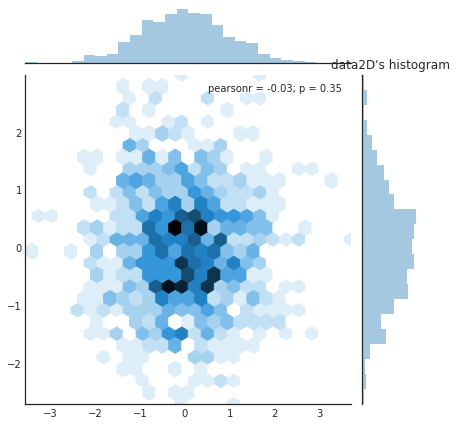

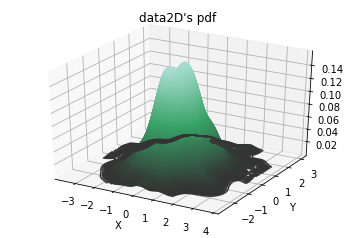

In [5]:
data = pd.DataFrame(data2D.T, columns=["X", "Y"])

z=np.histogram2d(data["X"],data["Y"],bins=50)
print("data2D's histogram:",z[0])

with sns.axes_style("white"):
    sns.jointplot(x=data2D[0], y=data2D[1], kind="hex",bins=50);
plt.title("data2D's histogram")
plt.show()

ax = plt.subplot(projection='3d')
sns.kdeplot(data["X"],data["Y"],n_levels=1000,cut=0)
plt.title("data2D's pdf")
plt.show()

In [6]:
df=pd.DataFrame(data3D[0].T,columns=["X"])
df["Y"]=pd.DataFrame(data3D[1].T)
df["Z"]=pd.DataFrame(data3D[2].T)
H, edges = np.histogramdd(df.values, bins = (10, 10, 10))

For 3D data, I also plot the edge distribution of each axis.

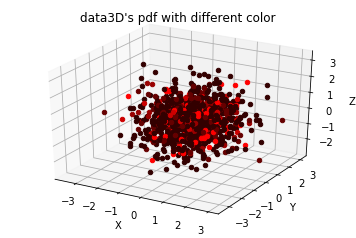

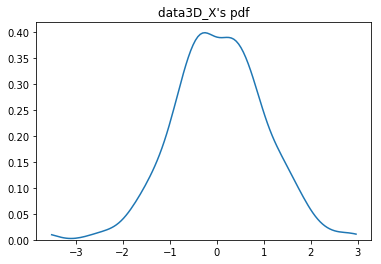

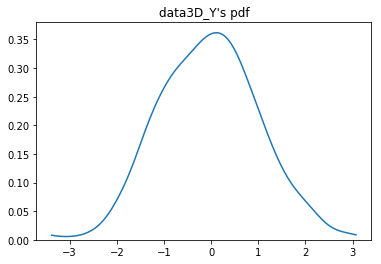

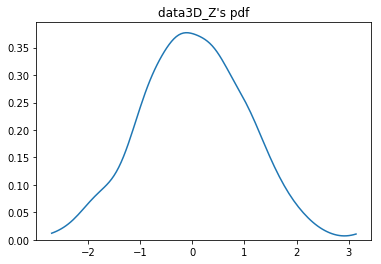

In [7]:
ax = plt.subplot(111, projection='3d')# 创建一个三维的绘图工程
x, y, z = data3D[0], data3D[1], data3D[2]
H=H.flatten()
for i in range(1000):
    red=int(((H[i]+1)*255/5).item())
    if red>255:
        red=255
    color="#"+hex(red).replace('0x','')+"0000"
    ax.scatter(x[i],y[i],z[i],c=color)

ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.title("data3D's pdf with different color")
plt.show()

#plot the pdf of X,Y,Z dimension
sns.kdeplot(data3D[0],cut=0);
plt.title("data3D_X's pdf")
plt.show()

sns.kdeplot(data3D[1],cut=0);
plt.title("data3D_Y's pdf")
plt.show()

sns.kdeplot(data3D[2],cut=0);
plt.title("data3D_Z's pdf")
plt.show()

# 2. Use the streams in 1 to do the following:
a)b)c) convert the data to the data of corresponding mean and covariance.

After I converted, I also plotted their scatter plots and pdfs.

In [8]:
#使用 X=BZ+mu 转换，Z为标准正态分布，而BB.T=∑
#转换原理：https://www.zhihu.com/question/36339816
data1D=data1D*3-2

mu = np.array([[1,2]])
Sigma = np.array([[4,4],[4,9]])
R = cholesky(Sigma)
data2D=(np.dot(R,data2D).T+mu).T

mu = np.array([[5,-5,6]])
Sigma = np.array([[5,2,-1],[2,5,0],[-1,0,4]])
R = cholesky(Sigma)
data3D=(np.dot(R,data3D).T+mu).T

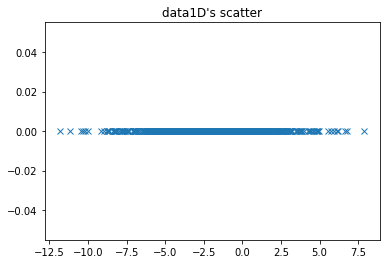

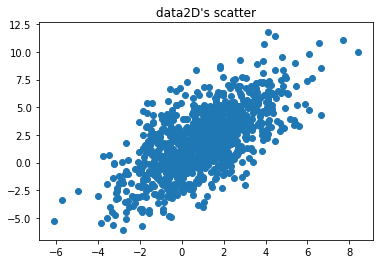

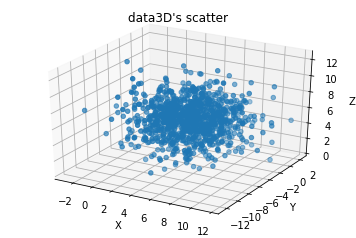

In [9]:
#绘制散点图
plt.plot(data1D,[0]*1000,"x")
plt.title("data1D's scatter")
plt.show()

x,y = data2D[0], data2D[1]
plt.scatter(x,y)
plt.title("data2D's scatter")
plt.show()

x, y, z = data3D[0], data3D[1], data3D[2]
ax = plt.subplot(111, projection='3d')# 创建一个三维的绘图工程
ax.scatter(x,y,z)
ax.set_zlabel('Z')# 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.title("data3D's scatter")
plt.show()

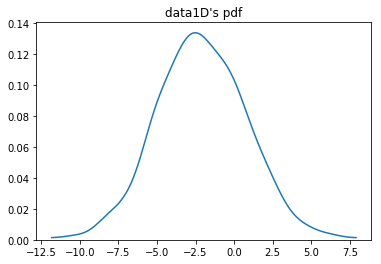

In [10]:
sns.kdeplot(data1D,cut=0);
plt.title("data1D's pdf")
plt.show()

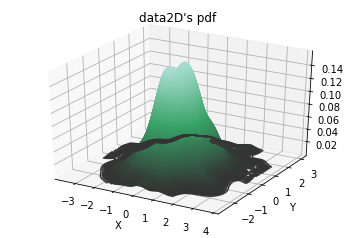

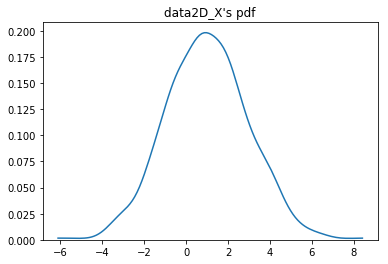

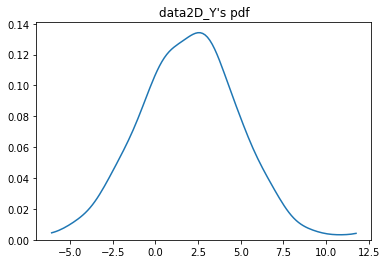

In [11]:
ax = plt.subplot(projection='3d')
sns.kdeplot(data["X"],data["Y"],n_levels=1000,cut=0)
plt.title("data2D's pdf")
plt.show()

#plot the pdf of X,Y dimension
sns.kdeplot(data2D[0],cut=0);
plt.title("data2D_X's pdf")
plt.show()

sns.kdeplot(data2D[1],cut=0);
plt.title("data2D_Y's pdf")
plt.show()

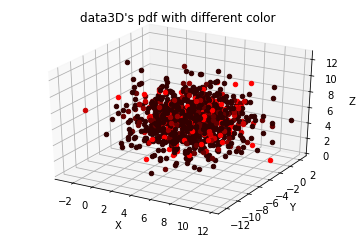

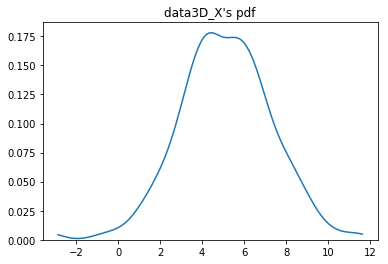

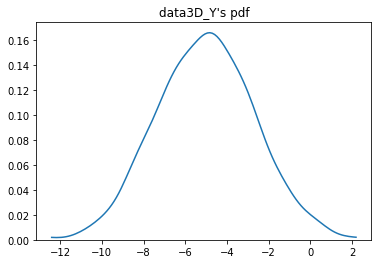

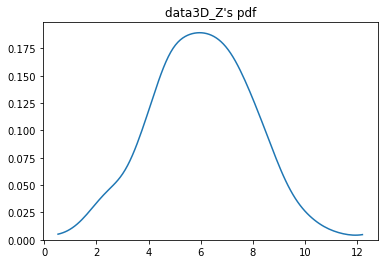

In [12]:
#三维pdf，颜色深浅表示第四维大小，越深则越大
df=pd.DataFrame(data3D[0].T,columns=["X"])
df["Y"]=pd.DataFrame(data3D[1].T)
df["Z"]=pd.DataFrame(data3D[2].T)
H, edges = np.histogramdd(df.values, bins = (10, 10, 10))

ax = plt.subplot(111, projection='3d')# 创建一个三维的绘图工程
x, y, z = data3D[0], data3D[1], data3D[2]
H=H.flatten()
for i in range(1000):
    red=int(((H[i]+1)*255/5).item())
    if red>255:
        red=255
    color="#"+hex(red).replace('0x','')+"0000"
    ax.scatter(x[i],y[i],z[i],c=color)

ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.title("data3D's pdf with different color")
plt.show()

#plot the pdf of X,Y,Z dimension
sns.kdeplot(data3D[0],cut=0);
plt.title("data3D_X's pdf")
plt.show()

sns.kdeplot(data3D[1],cut=0);
plt.title("data3D_Y's pdf")
plt.show()

sns.kdeplot(data3D[2],cut=0);
plt.title("data3D_Z's pdf")
plt.show()

# 4 compute the mean and covariance of 1D,2D,3D

In [13]:
mean1D=np.mean(data1D)
cov1D=math.sqrt(np.var(data1D))
print("1D数据点均值:",mean1D)
print("1D数据点标准差:",cov1D)

1D数据点均值: -2.104686485401413
1D数据点标准差: 2.903544125549032


In [14]:
mean2D=np.array([np.mean(data2D[0]),np.mean(data2D[1])])
cov2D=np.cov(data2D)
print("2D数据点均值:",mean2D)
print("2D数据点协方差:\n",cov2D)

2D数据点均值: [1.004301   1.98992705]
2D数据点协方差:
 [[3.86610452 3.73888942]
 [3.73888942 8.38536952]]


In [15]:
mean3D=np.array([np.mean(data3D[0]),np.mean(data3D[1]),np.mean(data3D[2])])
cov3D=np.cov(data3D)
print("3D数据点均值",mean3D)
print("3D数据点协方差:\n",cov3D)

3D数据点均值 [ 5.14315375 -5.01498226  6.01371955]
3D数据点协方差:
 [[ 4.53893975  1.93845329 -0.76234194]
 [ 1.93845329  5.35187422 -0.00974085]
 [-0.76234194 -0.00974085  3.82772317]]
